In [1]:
# import statements

from IPython.display import SVG
import networkx as nx
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
from math import comb
import statistics


In [3]:
# Peptostreptococcaceae
ibs = "ibs"
ibd = "ibd"
crc = "crc"
classifier = 'family'

ibs_files = glob.glob('../results/'+ibs+'/'+ibs+'_dicts/*')
ibd_files = glob.glob('../results/'+ibd+'/'+ibd+'_dicts/*')
crc_files = glob.glob('../results/'+ibs+'/'+ibs+'_dicts/*')

ibs_graph = pickle.load(open("../results/graphs/ibs_graph.pkl", "rb"))
ibd_graph = pickle.load(open("../results/graphs/ibd_graph.pkl", "rb"))
crc_graph = pickle.load(open("../results/graphs/crc_graph.pkl", "rb"))

In [27]:
# pick patient
pt_dis = "ibs"
pt_name = "ERR4775534"
indiv = pickle.load(open("../results/"+pt_dis+"/"+pt_dis+"_dicts/"+pt_name+".pkl", "rb"))
classifier = "family"

In [34]:
# calculate thresholds

def calc_thresholds(indiv):
    organism_count = 0
    distinct = len(indiv[classifier])
    seen = []

    for i in indiv[classifier]:
        organism_count += indiv[classifier][i]

    vtx_list = []

    for i in indiv[classifier]:
        if indiv[classifier][i] > (organism_count / distinct) * 2:
            vtx_list.append(i)
    
    return vtx_list

In [35]:
def make_graph(vtx_list):
    graph = nx.Graph()
    used = []
    for node in indiv[classifier]:
        if node not in used:
            graph.add_node(node, node_size=0)
        used.append(node)    

    for node in vtx_list:
        for other in vtx_list:
            if node != other:            
                graph.add_edge(node, other, weight = 0.1, color = 'red')
    
    return graph

In [41]:
nbr_list = []
node_list = []
num_correct = 0
total = 0
for file in ibs_files:
    with open(file, 'rb') as f:
        indiv = pickle.load(f)
    vtx_list = calc_thresholds(indiv)
    graph = make_graph(vtx_list)
    ibs_sim_score = 0
    ibd_sim_score = 0
    count = 0
    for node in graph.nodes:
        for nbr in graph.neighbors(node):
            if node in ibs_graph.nodes:
                if nbr in ibs_graph.neighbors(node):
                    ibs_sim_score += 1
            if node in ibd_graph.nodes:
                if nbr in ibd_graph.neighbors(node):
                    ibd_sim_score += 1
            count += 1
    
    if ibd_sim_score < ibs_sim_score:
        num_correct+= 1
    total +=1
    nbr_list.append(count)
    node_list.append(len(vtx_list))

print("corr,", num_correct, "total:", total, "ratio:", num_correct/total)


corr, 82 total: 87 ratio: 0.9425287356321839


In [39]:
num_correct = 0
total = 0
for file in ibd_files:
    with open(file, 'rb') as f:
        indiv = pickle.load(f)
    vtx_list = calc_thresholds(indiv)
    graph = make_graph(vtx_list)
    ibs_sim_score = 0
    ibd_sim_score = 0

    for node in graph.nodes:
        for nbr in graph.neighbors(node):
            if node in ibs_graph.nodes:
                if nbr in ibs_graph.neighbors(node):
                    ibs_sim_score += 1
            if node in ibd_graph.nodes:
                if nbr in ibd_graph.neighbors(node):
                    ibd_sim_score += 1
    
    if ibd_sim_score > ibs_sim_score:
        num_correct+= 1
    total +=1

print("corr,", num_correct, "total:", total, "ratio:", num_correct/total)


corr, 168 total: 177 ratio: 0.9491525423728814


In [40]:
num_correct = 0
total = 0
for file in crc_files:
    with open(file, 'rb') as f:
        indiv = pickle.load(f)
    vtx_list = calc_thresholds(indiv)
    graph = make_graph(vtx_list)
    ibs_sim_score = 0
    ibd_sim_score = 0

    for node in graph.nodes:
        for nbr in graph.neighbors(node):
            if node in ibs_graph.nodes:
                if nbr in ibs_graph.neighbors(node):
                    ibs_sim_score += 1
            if node in ibd_graph.nodes:
                if nbr in ibd_graph.neighbors(node):
                    ibd_sim_score += 1
    
    if ibd_sim_score > ibs_sim_score:
        num_correct+= 1
    total +=1

print("corr,", num_correct, "total:", total, "ratio:", num_correct/total)


corr, 3 total: 87 ratio: 0.034482758620689655


In [42]:
nbr_list1 = []
node_list1 = []
nbr_list2 = []
node_list2 = []
num_correct = 0
total = 0
for file in ibs_files + ibd_files:
    with open(file, 'rb') as f:
        indiv = pickle.load(f)
    vtx_list = calc_thresholds(indiv)
    graph = make_graph(vtx_list)
    ibs_sim_score = 0
    ibd_sim_score = 0
    count = 0
    for node in graph.nodes:
        for nbr in graph.neighbors(node):
            if node in ibs_graph.nodes:
                if nbr in ibs_graph.neighbors(node):
                    ibs_sim_score += 1
            if node in ibd_graph.nodes:
                if nbr in ibd_graph.neighbors(node):
                    ibd_sim_score += 1
            count += 1
    
    if ibd_sim_score < ibs_sim_score:
        num_correct+= 1
        nbr_list1.append(count)
        node_list1.append(len(vtx_list))
    else:
        nbr_list2.append(count)
        node_list2.append(len(vtx_list))
    total +=1

print("corr,", num_correct, "total:", total, "ratio:", num_correct/total)


corr, 82 total: 264 ratio: 0.3106060606060606


In [46]:
print(len(node_list1), len(nbr_list1), len(node_list2), len(nbr_list2))

82 82 182 182


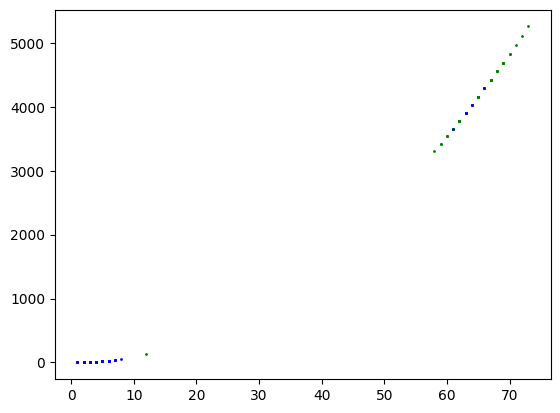

In [50]:
plt.scatter(node_list1, nbr_list1, c='green', s=1)
plt.scatter(node_list2, nbr_list2, c='blue', s = 1)
